# Comparative Analysis
In this notebook, we compare DDM with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

In [3]:
from src.visualizer import plot_profile, plot_profile_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
confs = (1e-10, 1e-20, 1e-30, 1e-40, 1e-50, 1e-60, 1e-70, 1e-80, 1e-90, 1e-100)
methods = list()

for c in confs:
    candidate_name = f"{c}-drift_confidence"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/hddm_drift_confidence/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,1e-10-drift_confidence,1e-20-drift_confidence,1e-30-drift_confidence,1e-40-drift_confidence,1e-50-drift_confidence,1e-60-drift_confidence,1e-70-drift_confidence,1e-80-drift_confidence,1e-90-drift_confidence,1e-100-drift_confidence
0,DodgerLoopDay,0.086,0.088,0.090,0.093,0.095,0.097,0.095,0.247,0.277,0.510
1,EEGRat,0.450,0.584,0.789,0.746,0.500,0.500,0.500,0.500,0.500,0.500
2,EEGRat2,0.410,0.469,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
3,FaceFour,0.125,0.163,0.272,0.389,0.379,0.487,0.571,0.487,0.613,0.613
4,GrandMalSeizures2,0.006,0.007,0.007,0.007,0.008,0.008,0.007,0.007,0.008,0.009
5,GreatBarbet1,0.293,0.407,0.530,0.658,0.682,0.674,0.665,0.656,0.355,0.355
6,Herring,0.014,0.026,0.627,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,InlineSkate,0.097,0.122,0.098,0.132,0.149,0.220,0.461,0.358,0.358,0.358
8,InsectEPG1,0.933,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653
9,MelbournePedestrian,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149


Let's calculate the mean/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_5245/2219294936.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores.mean(axis=0).round(3)


1e-10-drift_confidence     0.173
1e-20-drift_confidence     0.280
1e-30-drift_confidence     0.362
1e-40-drift_confidence     0.369
1e-50-drift_confidence     0.362
1e-60-drift_confidence     0.375
1e-70-drift_confidence     0.389
1e-80-drift_confidence     0.378
1e-90-drift_confidence     0.371
1e-100-drift_confidence    0.382
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_5245/1084607075.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores.std(axis=0).round(3)


1e-10-drift_confidence     0.213
1e-20-drift_confidence     0.249
1e-30-drift_confidence     0.260
1e-40-drift_confidence     0.279
1e-50-drift_confidence     0.268
1e-60-drift_confidence     0.266
1e-70-drift_confidence     0.266
1e-80-drift_confidence     0.260
1e-90-drift_confidence     0.256
1e-100-drift_confidence    0.257
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_5245/3065857076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  ranks = df_scores.rank(1, method = 'min', ascending=False)


In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

1e-10-drift_confidence:wins=5 rank=7.66667
1e-20-drift_confidence:wins=8 rank=5.04762
1e-30-drift_confidence:wins=11 rank=3.2381
1e-40-drift_confidence:wins=9 rank=3.09524
1e-50-drift_confidence:wins=10 rank=2.47619
1e-60-drift_confidence:wins=10 rank=1.95238
1e-70-drift_confidence:wins=10 rank=2.04762
1e-80-drift_confidence:wins=9 rank=2.42857
1e-90-drift_confidence:wins=10 rank=2.14286
1e-100-drift_confidence:wins=13 rank=1.95238


Let's plot and output the ranks.

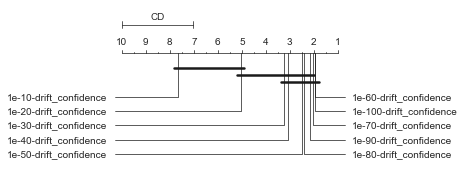

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=5, filename="../../figures/cd_ablation_hddm_drift_confidence.pdf")

Let's compute wins/losses against ClaSP.

In [11]:
selection = "1e-60-drift_confidence"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

1e-60-drift_confidence vs 1e-10-drift_confidence: (wins/ties/losses): 16/4/1
1e-60-drift_confidence vs 1e-20-drift_confidence: (wins/ties/losses): 11/8/2
1e-60-drift_confidence vs 1e-30-drift_confidence: (wins/ties/losses): 8/10/3
1e-60-drift_confidence vs 1e-40-drift_confidence: (wins/ties/losses): 8/12/1
1e-60-drift_confidence vs 1e-50-drift_confidence: (wins/ties/losses): 5/15/1
1e-60-drift_confidence vs 1e-70-drift_confidence: (wins/ties/losses): 5/14/2
1e-60-drift_confidence vs 1e-80-drift_confidence: (wins/ties/losses): 4/15/2
1e-60-drift_confidence vs 1e-90-drift_confidence: (wins/ties/losses): 3/15/3
1e-60-drift_confidence vs 1e-100-drift_confidence: (wins/ties/losses): 2/14/5


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_5245/4134506879.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_5245/4134506879.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


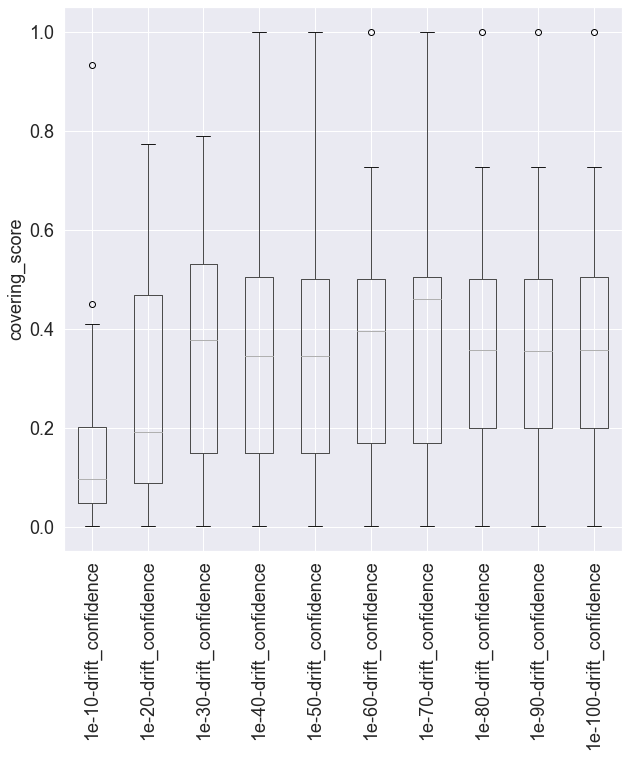

In [12]:
fontsize = 18
_, ax = plt.subplots(figsize=(10,10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.savefig("../../figures/bp_ablation_hddm_drift_confidence.pdf", bbox_inches="tight") 